# 1. Install Dependencies and Setup

In [73]:
import tensorflow as tf
import os

In [74]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [75]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove unwanted images

In [76]:
import cv2
import imghdr

In [77]:
data_dir = 'data' 

In [78]:
os.listdir('data')

['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']

In [79]:
image_exts = ['jpeg','png', 'bmp', 'jpg']

In [80]:
from PIL import Image
import os

def convert_jpg_to_jpeg(file_path):

    with Image.open(file_path) as img:
        # Define the new file path with .jpeg extension
        new_file_path = os.path.splitext(file_path)[0] + '.jpeg'
        
        # Save the image in JPEG format
        img.convert('RGB').save(new_file_path, 'JPEG')
        
        # Optionally, remove the original .jpg file
        os.remove(file_path)
        
        print(f"Converted {file_path} to {new_file_path}")


In [81]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            tip = image_path.split(".")[-1].lower()
            if tip == 'jpg':
                convert_jpg_to_jpeg(image_path)
                
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
                print("removed")
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [82]:
import numpy as np
from matplotlib import pyplot as plt

In [83]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [84]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2152 files belonging to 3 classes.


In [85]:
len(data)

68

In [86]:
class_names = data.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [87]:
#converting our data inoto a iteratior to access it by batches of 32 image and their labels
data_iterator = data.as_numpy_iterator()

In [88]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x000001F3B9262090>)

In [89]:
batch = data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [90]:
batch[0][0]

array([[[179., 177., 190.],
        [179., 177., 190.],
        [181., 179., 192.],
        ...,
        [199., 197., 210.],
        [192., 190., 203.],
        [179., 177., 190.]],

       [[176., 174., 187.],
        [178., 176., 189.],
        [182., 180., 193.],
        ...,
        [191., 189., 202.],
        [191., 189., 202.],
        [186., 184., 197.]],

       [[177., 175., 188.],
        [180., 178., 191.],
        [185., 183., 196.],
        ...,
        [189., 187., 200.],
        [196., 194., 207.],
        [200., 198., 211.]],

       ...,

       [[147., 144., 155.],
        [138., 135., 146.],
        [125., 122., 133.],
        ...,
        [127., 119., 130.],
        [123., 115., 126.],
        [148., 140., 151.]],

       [[138., 135., 146.],
        [130., 127., 138.],
        [117., 114., 125.],
        ...,
        [151., 143., 154.],
        [143., 135., 146.],
        [129., 121., 132.]],

       [[112., 109., 120.],
        [122., 119., 130.],
        [127., 1

Each batch contain, 32 images as numpy array respahed into 256x256x3 format and their labels.

In [91]:
batch[1]

array([0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0])

Lets check which label is assigned to which type of image

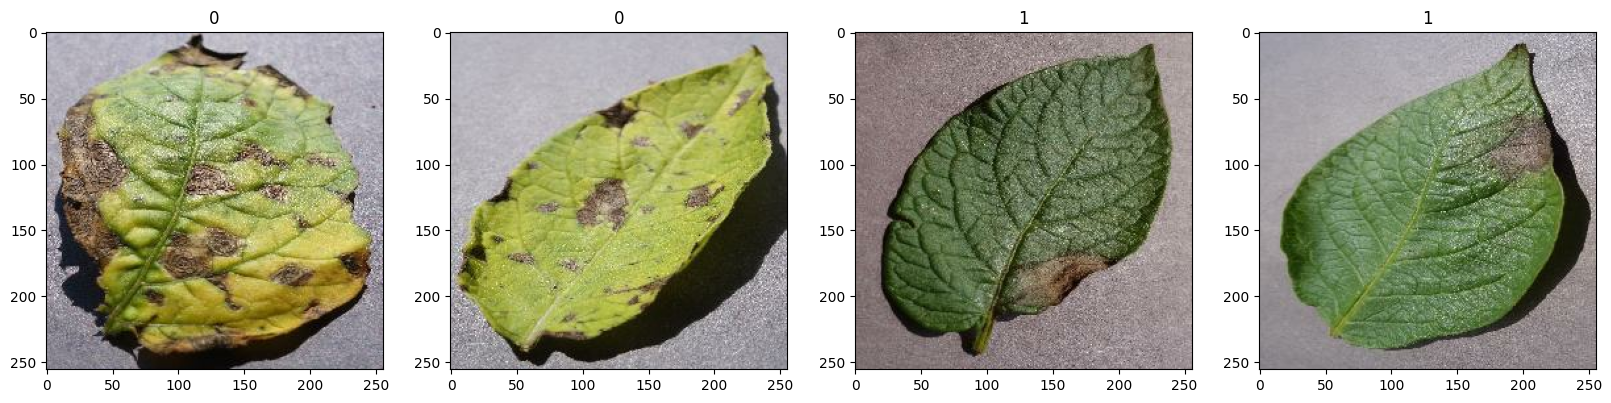

In [92]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

So we can clearly see that- 

- Label 0 is for Happy images
- Lavel 1 is for sad images

# 4. Normalizing Data

In [93]:
data_scaled = data.map(lambda x,y: (x/255, y))

In [94]:
data_scaled.as_numpy_iterator().next()

(array([[[[0.44313726, 0.39607844, 0.39607844],
          [0.5058824 , 0.45882353, 0.45882353],
          [0.54509807, 0.49803922, 0.49803922],
          ...,
          [0.5921569 , 0.5568628 , 0.5686275 ],
          [0.38039216, 0.34509805, 0.35686275],
          [0.56078434, 0.5254902 , 0.5372549 ]],
 
         [[0.4509804 , 0.40392157, 0.40392157],
          [0.5019608 , 0.45490196, 0.45490196],
          [0.5294118 , 0.48235294, 0.48235294],
          ...,
          [0.56078434, 0.5254902 , 0.5372549 ],
          [0.6156863 , 0.5803922 , 0.5921569 ],
          [0.6117647 , 0.5764706 , 0.5882353 ]],
 
         [[0.4862745 , 0.4392157 , 0.4392157 ],
          [0.54509807, 0.49803922, 0.49803922],
          [0.5803922 , 0.53333336, 0.53333336],
          ...,
          [0.5019608 , 0.46666667, 0.47843137],
          [0.6156863 , 0.5803922 , 0.5921569 ],
          [0.5764706 , 0.5411765 , 0.5529412 ]],
 
         ...,
 
         [[0.62352943, 0.5921569 , 0.58431375],
          [0.58039

# 5. Split Data

In [95]:
'''
# Load the dataset from a directory
train_dataset = tf.keras.utils.image_dataset_from_directory(
    'path_to_your_directory',  # Path to the main directory containing subdirectories of images
    image_size=(224, 224),     # Resize all images to this size
    batch_size=32,             # Number of images per batch
    shuffle=True,              # Shuffle the dataset
    validation_split=0.3,      # Split 30% of the data for validation
    subset='training',         # Specify whether this is the training subset
    seed=123                   # Random seed for reproducibility
)

# For validation dataset
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    'path_to_your_directory',
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    validation_split=0.3,
    subset='validation',
    seed=123
)
'''

"\n# Load the dataset from a directory\ntrain_dataset = tf.keras.utils.image_dataset_from_directory(\n    'path_to_your_directory',  # Path to the main directory containing subdirectories of images\n    image_size=(224, 224),     # Resize all images to this size\n    batch_size=32,             # Number of images per batch\n    shuffle=True,              # Shuffle the dataset\n    validation_split=0.3,      # Split 30% of the data for validation\n    subset='training',         # Specify whether this is the training subset\n    seed=123                   # Random seed for reproducibility\n)\n\n# For validation dataset\nvalidation_dataset = tf.keras.utils.image_dataset_from_directory(\n    'path_to_your_directory',\n    image_size=(224, 224),\n    batch_size=32,\n    shuffle=True,\n    validation_split=0.3,\n    subset='validation',\n    seed=123\n)\n"

In [96]:
# length of data in batches

len(data_scaled)

68

In [97]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [98]:
train_size, test_size, val_size

(47, 6, 13)

In [99]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [100]:
len(train), len(val), len(test)

(47, 13, 6)

# 6. Build Deep Learning Model

In [101]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import layers


In [103]:
output_units = len(os.listdir('data'))

In [104]:
data_augmentation = tf.keras.Sequential([
    
    layers.RandomFlip("horizontal_and_vertical"),  # Flip horizontally and vertically
    layers.RandomRotation(0.2),                    # Rotate by up to 20%
    layers.RandomZoom(0.2),                        # Zoom in by up to 20%
    layers.RandomContrast(0.2),                    # Adjust contrast by up to 20%
])

output_units = len(os.listdir('data')) #numbner of labels in our data

train = train.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [105]:
model = Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(output_units, activation='softmax'),
])

d:\projects\Potato Disease Classifier\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [108]:
logdir='logs'

In [109]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [110]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5154 - loss: 2.3575 - val_accuracy: 0.6394 - val_loss: 0.6277
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 1:07 1s/step - accuracy: 0.5000 - loss: 0.7273

KeyboardInterrupt: 

# 8. Plot Performance

In [ ]:
hist.history

{'accuracy': [0.6156914830207825,
  0.835106372833252,
  0.9408244490623474,
  0.9348404407501221,
  0.9840425252914429,
  0.9940159320831299,
  0.9953457713127136,
  0.9980053305625916,
  0.991356372833252,
  0.990026593208313,
  0.9940159320831299,
  0.9940159320831299,
  0.9720744490623474,
  0.90625,
  0.8922872543334961,
  0.9547872543334961,
  0.977393627166748,
  0.9853723645210266,
  0.9946808218955994,
  0.9953457713127136],
 'loss': [54.1158561706543,
  0.4596160650253296,
  0.20113898813724518,
  0.22961385548114777,
  0.058406420052051544,
  0.024721592664718628,
  0.033813267946243286,
  0.0072626108303666115,
  0.038489408791065216,
  0.042077504098415375,
  0.042354851961135864,
  0.027078712359070778,
  0.11478506028652191,
  0.32204514741897583,
  0.3397028148174286,
  0.15729552507400513,
  0.07950465381145477,
  0.06554541736841202,
  0.03452629595994949,
  0.025061342865228653],
 'val_accuracy': [0.7980769276618958,
  0.8004807829856873,
  0.8341346383094788,
  0.87

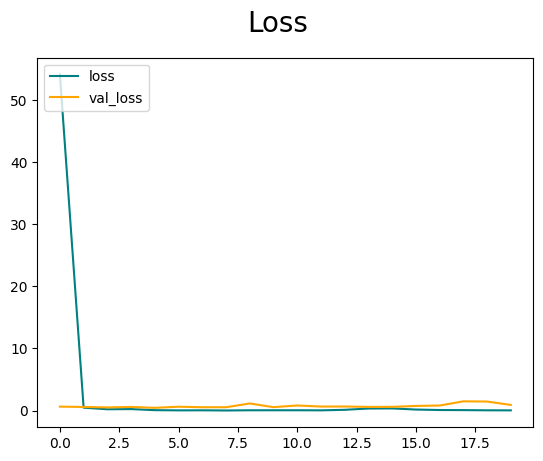

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

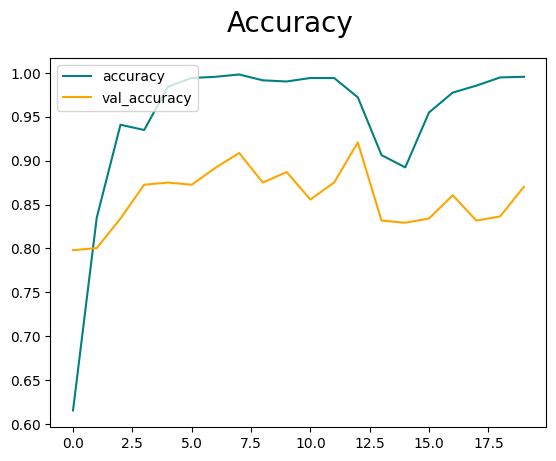

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

6

In [ ]:
len(test)

6

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pred = []
    for ypred in yhat:
        pred.append(np.argmax(ypred))
    ped = np.array(pred)
    pre.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y, pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [ ]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.9911111 0.21948819 0.5450212


In [ ]:
print(pred)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0]


# 10. Test

In [111]:
import cv2

In [ ]:
#cv2 imagwe are in BGR not in RGB color format so we need to change it if you want to see it properly

img = cv2.imread(')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


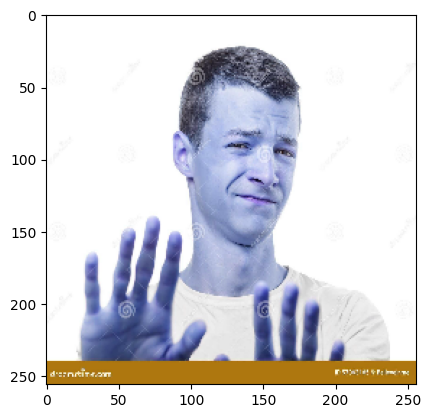

In [ ]:
#resizeing our image to match the input of model
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

We need to give our image as a batch of 1 image so for it we will add one more dimension to our image

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
yhat

array([[0.2257752 , 0.23616625, 0.24899721, 0.28906137]], dtype=float32)

In [ ]:
labels = os.listdir('data')

In [ ]:
index = np.argmax(yhat.reshape(-1))

In [ ]:
print(f"Prediction is {labels[index]}")

Prediction is sad


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifiernew.keras'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)